# <u><center>**Project Title : Book Recommendation System**</center></u>

### <b> Problem Description </b>
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.


### In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## <b> Data Description </b>

The Book-Crossing dataset comprises 3 files.

### <b>Users: </b>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

### <b>Books: </b> 
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S,Image-URL-M, Image-URL-L), i.e., small, medium large. These URLs point to the Amazon website.

### <b>Ratings: </b> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

Link for the dataset: [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

---

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

### Import Data

In [3]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

### Exploratory Data Analysis (EDA)

In [4]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [5]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
users.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [7]:
ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### Handling Missing Vaules

Books Dataset

In [12]:
# Missing Value Count Function
def show_missing():
    missing = books.columns[books.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(books[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(books[show_missing()].isnull().sum().sort_values(ascending = False)/len(books)*100,2))

Missing Data Count
Image-URL-L    3
Book-Author    2
Publisher      2
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Image-URL-L    0.0
Book-Author    0.0
Publisher      0.0
dtype: float64


In [13]:
#Dropping Nulls of Books data as they are negligible
books.dropna(inplace=True)

In [14]:
#Unique year values
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [15]:
#converting Reviews type into integer
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])

In [16]:
#Capping the outlier rows with Percentiles
upper_lim = books['Year-Of-Publication'].quantile(.95)
lower_lim = books['Year-Of-Publication'].quantile(.05)
books.loc[(books["Year-Of-Publication"] > upper_lim),"Year-Of-Publication"] = upper_lim
books.loc[(books["Year-Of-Publication"] < lower_lim),"Year-Of-Publication"] = lower_lim

In [17]:
#Upper limit of year of publication feature
print("Upper limit (Year):", upper_lim)

#lower limit of year of publication feature
print("Lower limit (Year):", lower_lim)

Upper limit (Year): 2003.0
Lower limit (Year): 1976.0


Users Dataset

In [18]:
# Missing Value Count Function
def show_missing():
    missing = users.columns[users.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(users[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(users[show_missing()].isnull().sum().sort_values(ascending = False)/len(users)*100,2))

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


In [19]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

minimum age 0 and max age 244? => so, outliers exist in age.

Age is positively skewed.

Median imputation is preferable for skewed distribution(be it right or left). 

So we will replace nulls with median in Age column. Outliers affect the mean value of the data but have little effect on the median or mode of a given set of data so we can impute nulls with median before removing outliers.

In [23]:
#Fill NaN Values in Age Column with Median
users['Age'] =users['Age'].fillna(users['Age'].median())

In [24]:
#Capping the outlier rows with Percentiles
upper_lim = users['Age'].quantile(.95)
lower_lim = users['Age'].quantile(.05)
users.loc[(users["Age"] > upper_lim),"Age"] = upper_lim
users.loc[(users["Age"] < lower_lim),"Age"] = lower_lim

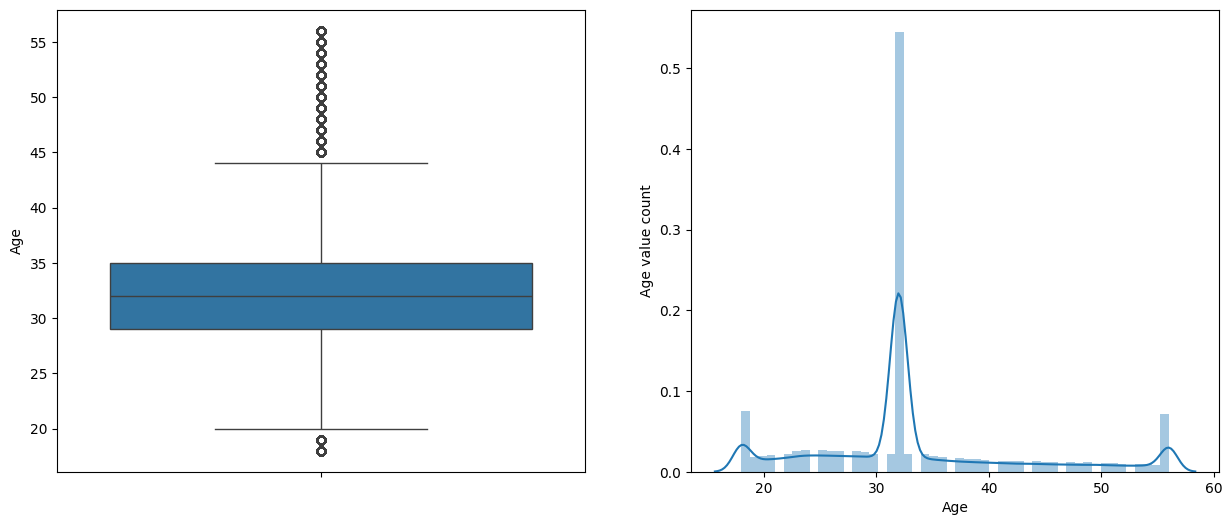

In [25]:
#Boxplot and distplot of Age
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=users["Age"])
fig.set_title('')
fig.set_ylabel("Age")
    
plt.subplot(1, 2, 2)
fig = sns.distplot(users["Age"].dropna())
fig.set_ylabel('Age value count')
fig.set_xlabel("Age")

plt.show()

In [26]:
users['Age'].describe()

count    278858.000000
mean         33.402570
std           9.523058
min          18.000000
25%          29.000000
50%          32.000000
75%          35.000000
max          56.000000
Name: Age, dtype: float64

In [27]:
users['locat']=users.Location.apply(lambda x: x.split(', '))
users['Country']=users.locat.apply(lambda x: x[2] if len(x)==3 else 'n/a')
users.drop('locat',axis=1,inplace=True)

Ratings Dataset

In [28]:
# Missing Value Count Function
def show_missing():
    missing = ratings.columns[ratings.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


### Cleaning Data

In [29]:
#users data head
users.head(1)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",32.0,usa


In [30]:
#shape of users dataframe
users.shape

(278858, 4)

In [31]:
#head of rating dataframe
ratings.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [32]:
#shape of rating dataframe
ratings.shape

(1149780, 3)

Merging users and ratings dataset on User-ID column

In [33]:
#Merging users and rating dataframe
data_users_ratings=pd.merge(users,ratings, on='User-ID')

Merging combined data of users and ratings with books data on ISBN column

In [34]:
#Merging both data
merged=pd.merge(books,data_users_ratings, on='ISBN')

In [35]:
#merged data info
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031128 entries, 0 to 1031127
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031128 non-null  object 
 1   Book-Title           1031128 non-null  object 
 2   Book-Author          1031128 non-null  object 
 3   Year-Of-Publication  1031128 non-null  int64  
 4   Publisher            1031128 non-null  object 
 5   Image-URL-S          1031128 non-null  object 
 6   Image-URL-M          1031128 non-null  object 
 7   Image-URL-L          1031128 non-null  object 
 8   User-ID              1031128 non-null  int64  
 9   Location             1031128 non-null  object 
 10  Age                  1031128 non-null  float64
 11  Country              1031128 non-null  object 
 12  Book-Rating          1031128 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 102.3+ MB


In [36]:
# Missing Value Count Function
def show_missing():
    missing = ratings.columns[ratings.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [37]:
#head of all 3 merged dataframe
merged.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",32.0,canada,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49.0,canada,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",32.0,n/a,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",32.0,canada,0


In [38]:
#dropping unnecessary features
merged.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1,inplace=True)

In [39]:
#Head of merged data frame
merged.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,"ottawa, ontario, canada",49.0,canada,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,"n/a, n/a, n/a",32.0,n/a,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,"sudbury, ontario, canada",32.0,canada,0


In [40]:
np.set_printoptions(threshold=10)

In [41]:
# unique values of ISBN feature
merged.ISBN.unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

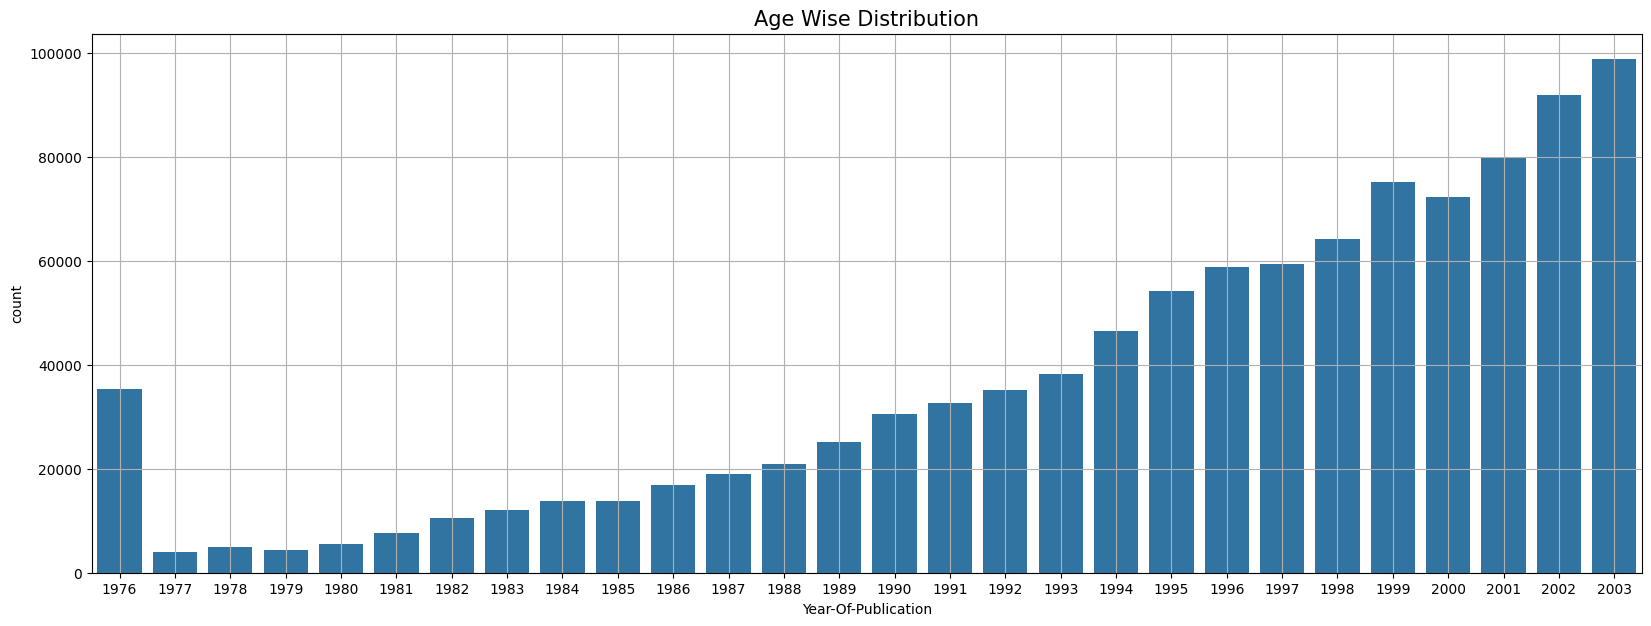

In [42]:
#barplot of age and its counts 
plt.figure(figsize=(20,7))
sns.countplot(x = merged['Year-Of-Publication'])
plt.title('Age Wise Distribution',fontsize=15)
plt.grid()
plt.show()

In [43]:
#Unique values of Year-Of-Publication'
merged['Year-Of-Publication'].unique()

array([2002, 2001, 1991, ..., 1989, 1984, 1977])

In [44]:
#Country value counts
merged.Country.value_counts()

Country
usa                                  745812
canada                                92954
n/a                                   37573
united kingdom                        32006
germany                               27654
                                      ...  
uganda                                    1
guinea-bissau                             1
mexico"                                   1
argentina"                                1
usa (currently living in england)         1
Name: count, Length: 281, dtype: int64

Duplicates

In [45]:
#checking duplicates
merged.duplicated().any()

np.False_

**Top 10 Sold Books**

In [46]:
# Top 10 sold Books
Top10_Book=merged['Book-Title'].value_counts().reset_index().head(10)
Top10_Book

,Book-Title,count
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828
5,Bridget Jones's Diary,815
6,The Secret Life of Bees,774
7,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
8,The Red Tent (Bestselling Backlist),723
9,Angels &amp; Demons,670


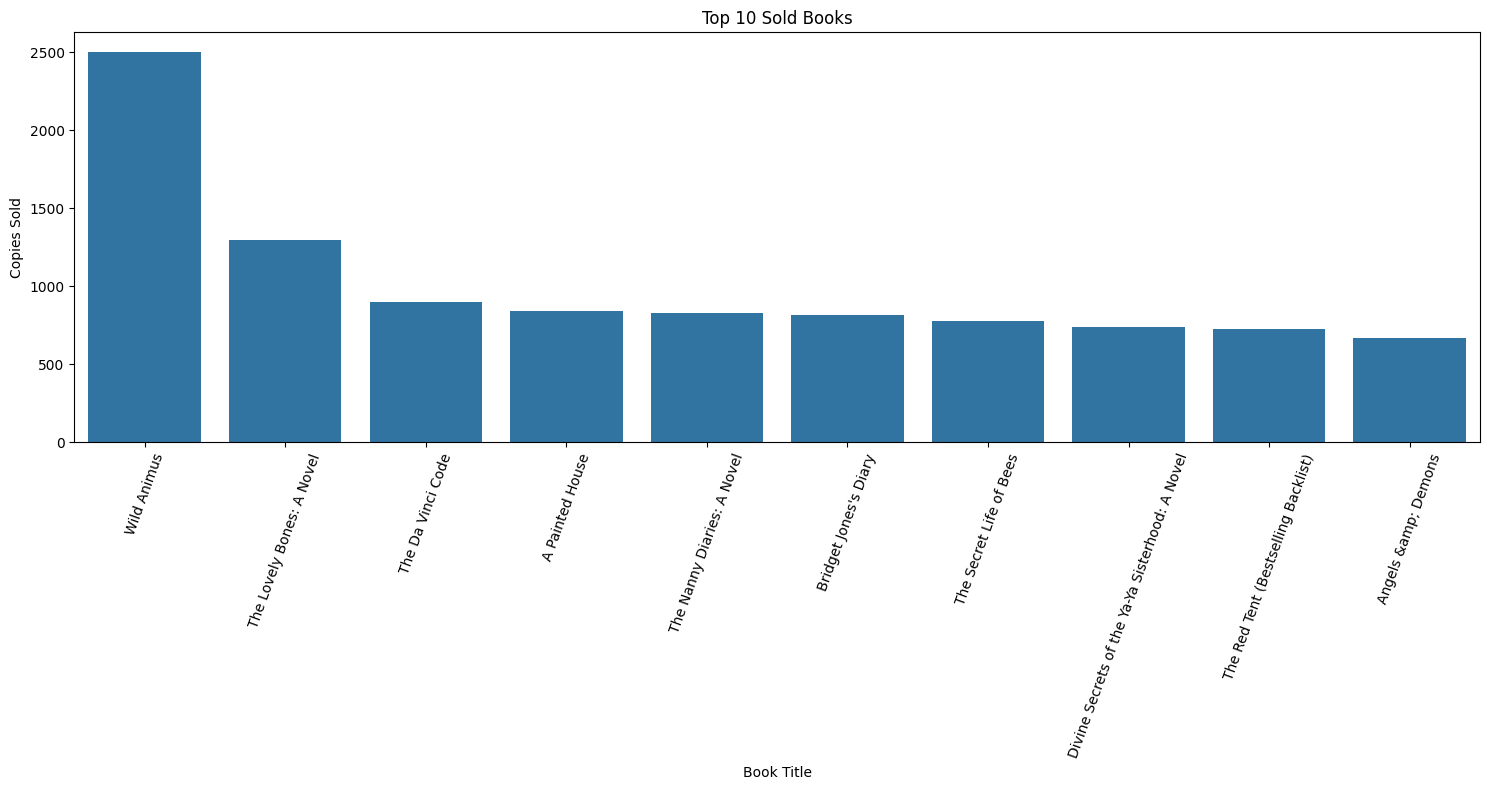

In [47]:
#barplot of Top 10 sold Books 
plt.rcParams['figure.figsize'] = (15, 8)
sns.barplot(x='Book-Title', y='count', data=Top10_Book)
plt.xticks(rotation=70, horizontalalignment="center")

plt.xlabel("Book Title")
plt.ylabel("Copies Sold")
plt.title("Top 10 Sold Books")

plt.tight_layout()
plt.show()

In [48]:
#books with same title but different author
books['Book-Title'].value_counts()

Book-Title
Selected Poems                                                                27
Little Women                                                                  24
Wuthering Heights                                                             21
Dracula                                                                       20
Adventures of Huckleberry Finn                                                20
                                                                              ..
The Middle Stories                                                             1
Stupid White Men : ...And Other Sorry Excuses for the State of the Nation!     1
The Commanding Heights : The Battle for the World Economy                      1
The Witchfinder (Amos Walker Mystery Series)                                   1
Microsoft Photodraw 2000 by Design                                             1
Name: count, Length: 242129, dtype: int64

**Top 10 Authors**

In [49]:
#Top 10 author with most books written
Top10_author=books['Book-Author'].value_counts().reset_index().head(10)
Top10_author

,Book-Author,count
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373
5,Francine Pascal,372
6,Isaac Asimov,330
7,Nora Roberts,315
8,Barbara Cartland,307
9,Charles Dickens,302


Text(0.5, 1.0, 'Barplot of top 10 Authors')

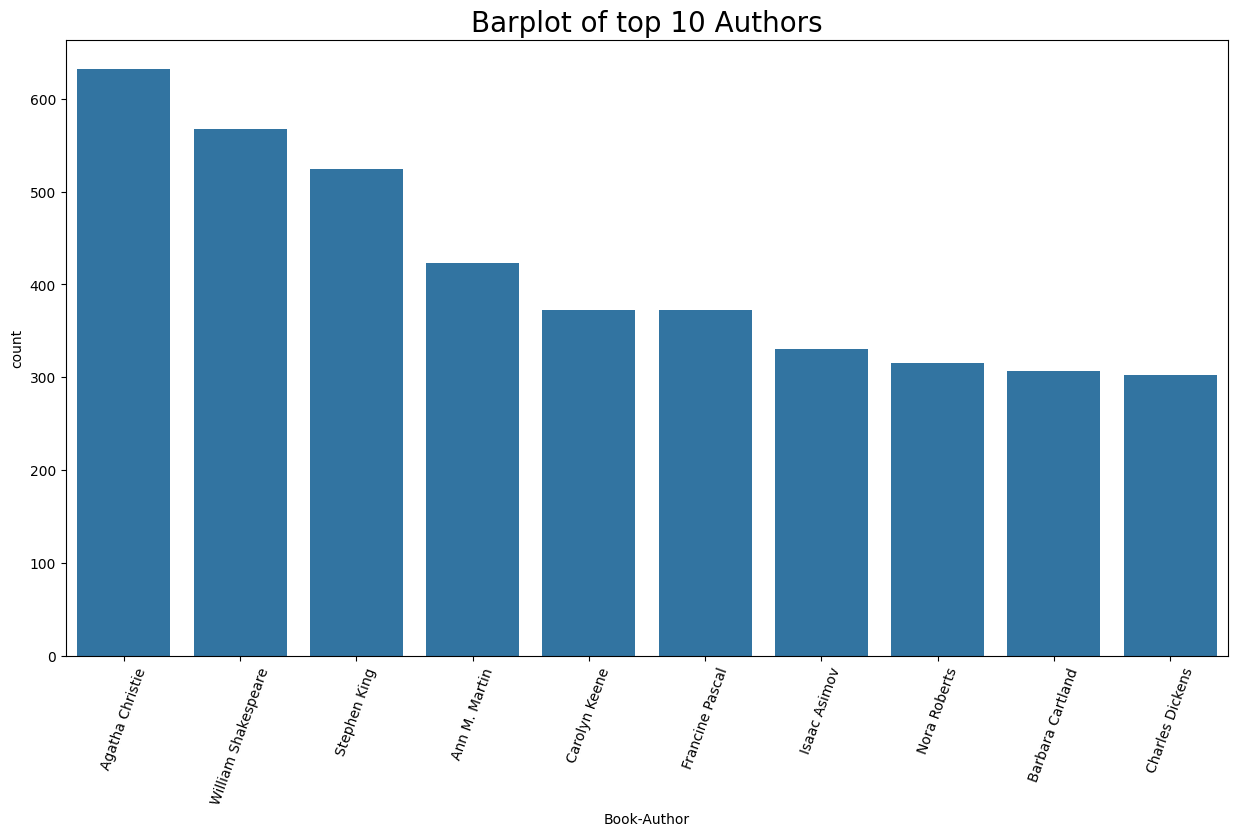

In [50]:
#barplot of top 10 Authors with most books written
sns.barplot(x="Book-Author",y="count",data=Top10_author)
plt.xticks(rotation=70, horizontalalignment="center")
plt.title("Barplot of top 10 Authors",fontsize=20)

**Value Counts Of Year-Of-Publication**

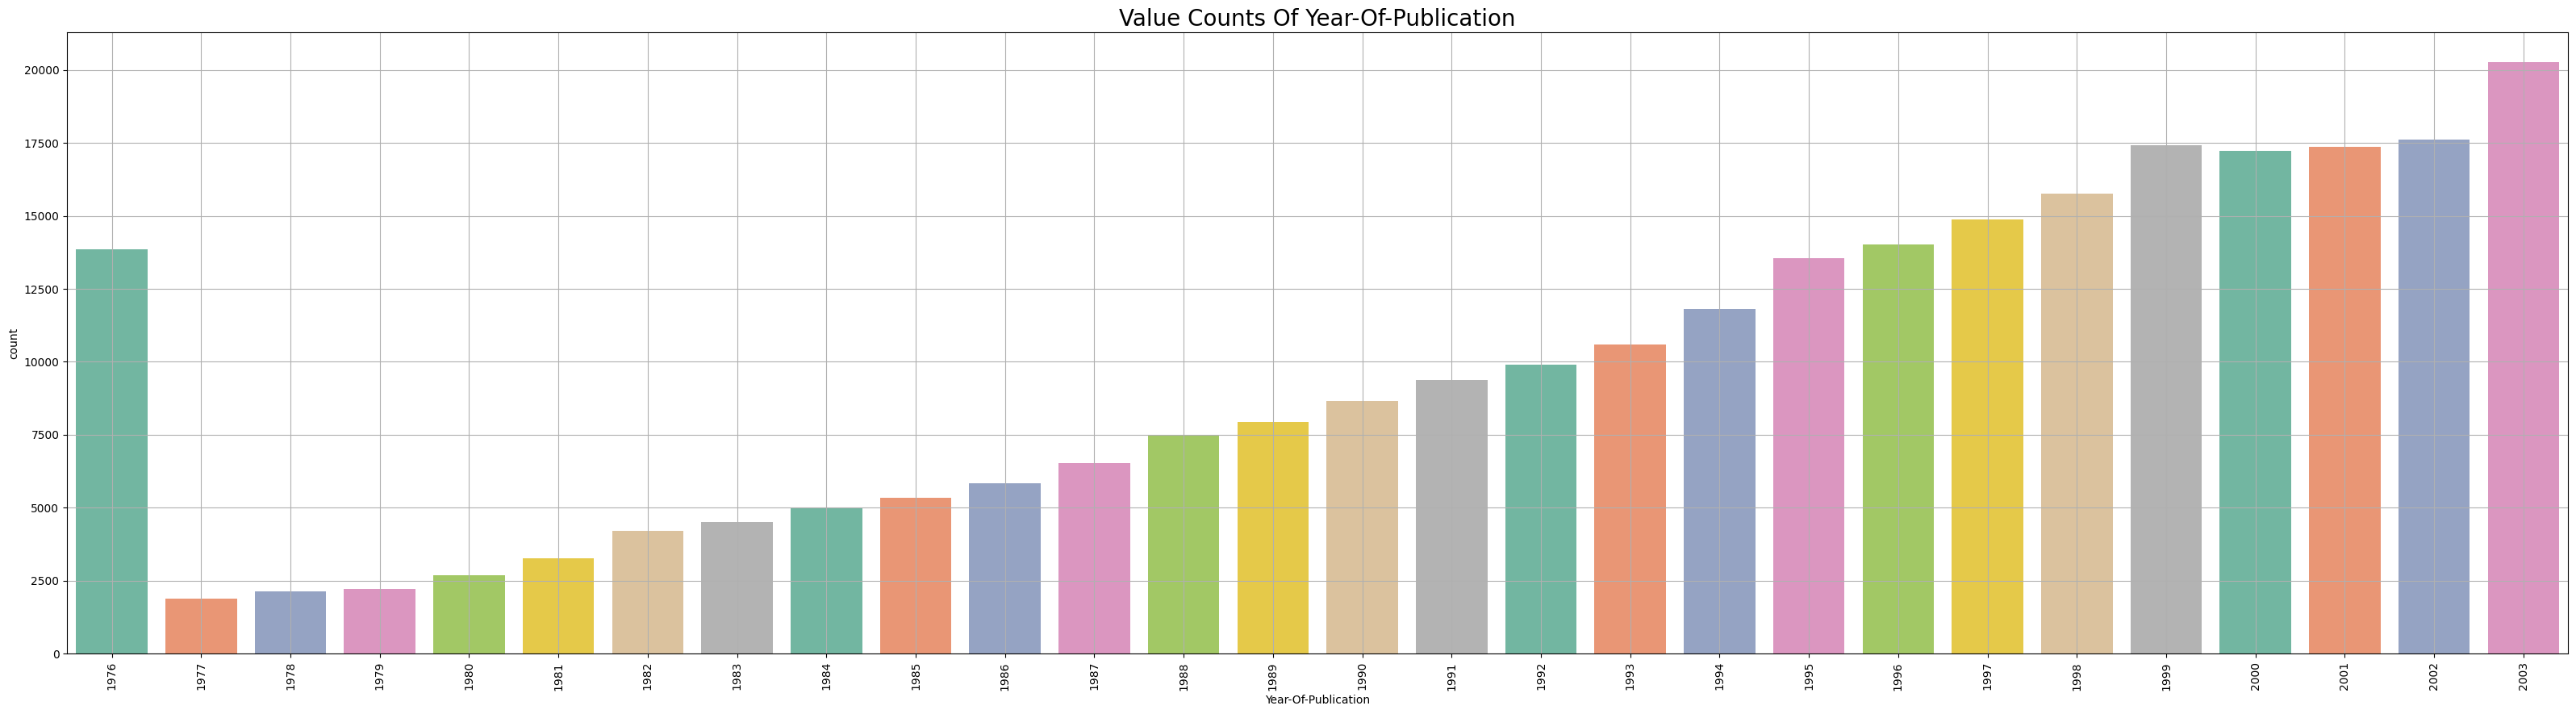

In [51]:
#Value Counts Of Year-Of-Publication
plt.rcParams['figure.figsize'] = (40,10)
fig = sns.countplot(x=books['Year-Of-Publication'],palette="Set2")
plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()
plt.title("Value Counts Of Year-Of-Publication",fontsize=20)
plt.show()

**Top 10 Publisher**

In [52]:
#Top 10 publisher
Top10_publisher=books['Publisher'].value_counts().reset_index().head(10)
Top10_publisher

,Publisher,count
0,Harlequin,7535
1,Silhouette,4220
2,Pocket,3905
3,Ballantine Books,3783
4,Bantam Books,3646
5,Scholastic,3160
6,Simon &amp; Schuster,2971
7,Penguin Books,2844
8,Berkley Publishing Group,2771
9,Warner Books,2727


Text(0.5, 1.0, 'Barplot of top 10 publisher')

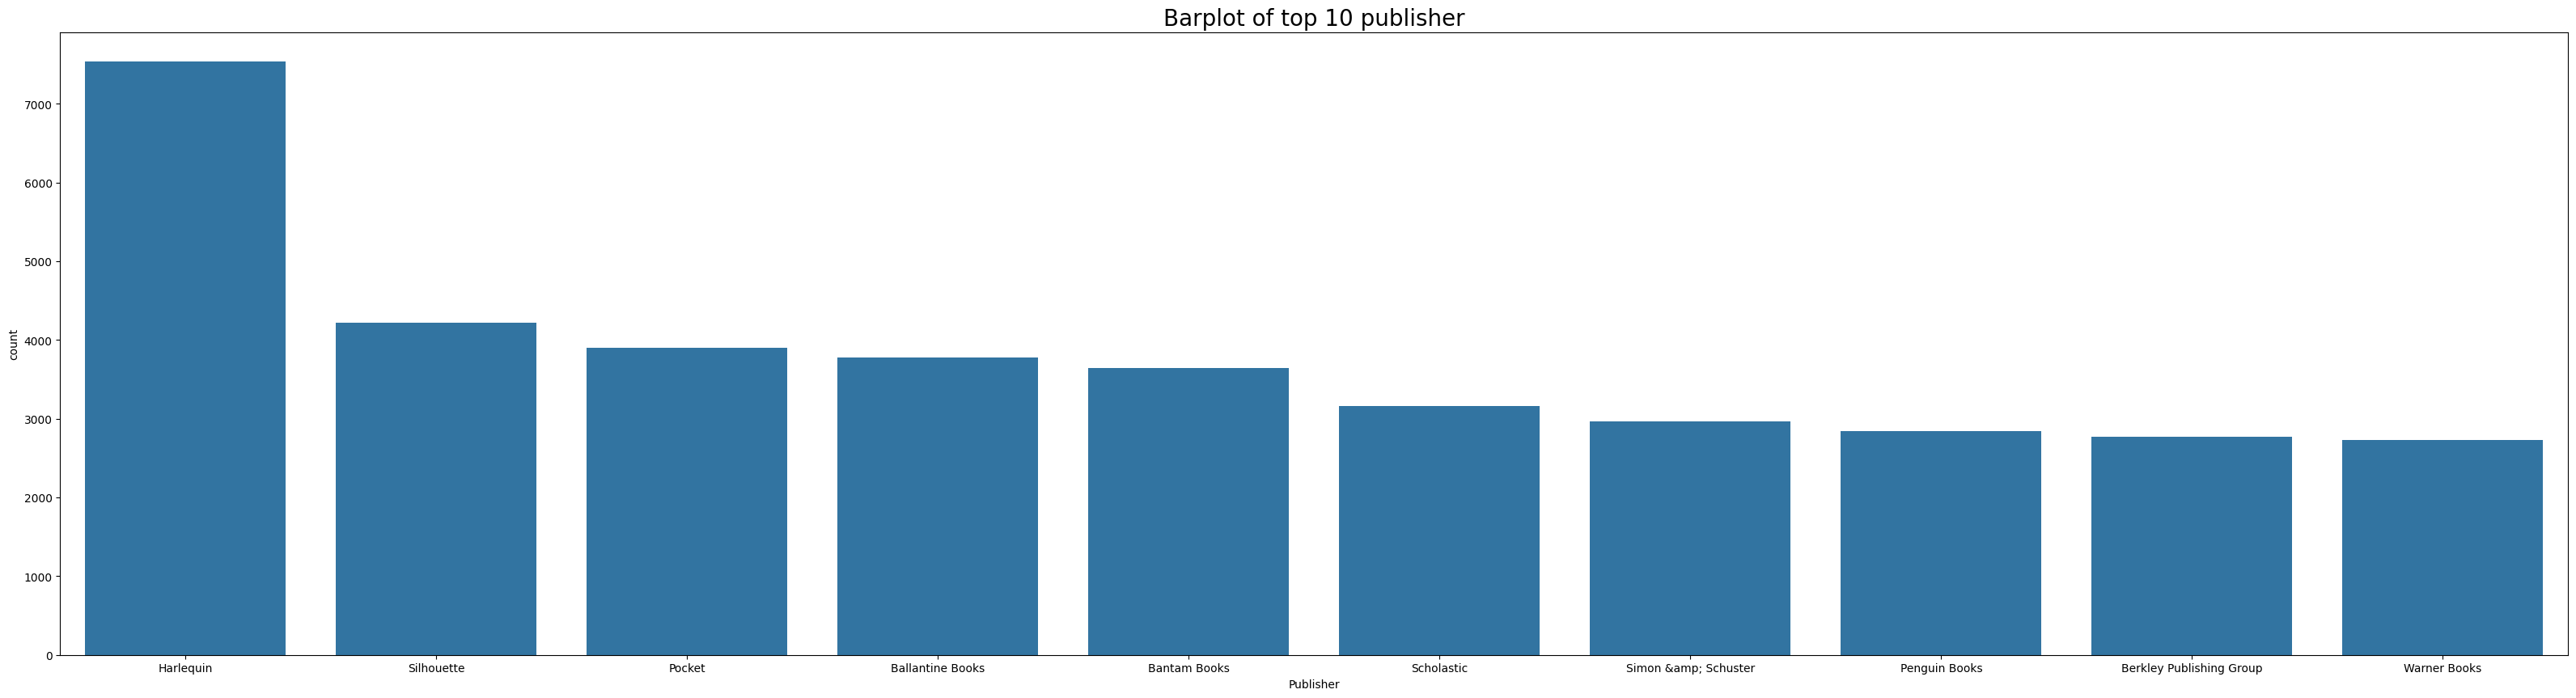

In [53]:
#barplot of top 10 publisher
sns.barplot(x="Publisher",y="count",data=Top10_publisher)

plt.title("Barplot of top 10 publisher",fontsize=20)

**Top 10 Country**

In [54]:
#value counts of country
Top10_Country=users['Country'].value_counts().reset_index().head(10)
Top10_Country

,Country,count
0,usa,139421
1,canada,21601
2,united kingdom,18314
3,germany,17024
4,spain,13096
5,australia,11730
6,italy,11244
7,n/a,5617
8,france,3440
9,portugal,3312


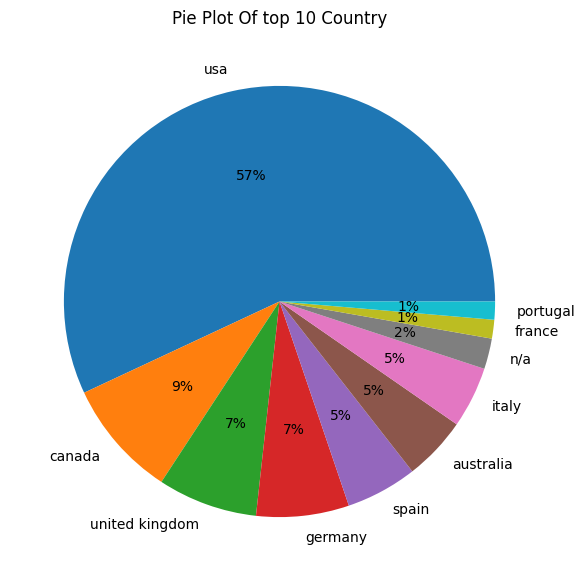

In [55]:
#Pie Plot Of Top10_Country
fig= plt.figure(figsize=(20,7))
plt.pie(Top10_Country['count'],labels=Top10_Country['Country'],autopct='%.0f%%')
plt.title('Pie Plot Of top 10 Country')
plt.show()

**Histogram Of Book-Ratings(Excluding 0 rating count)**

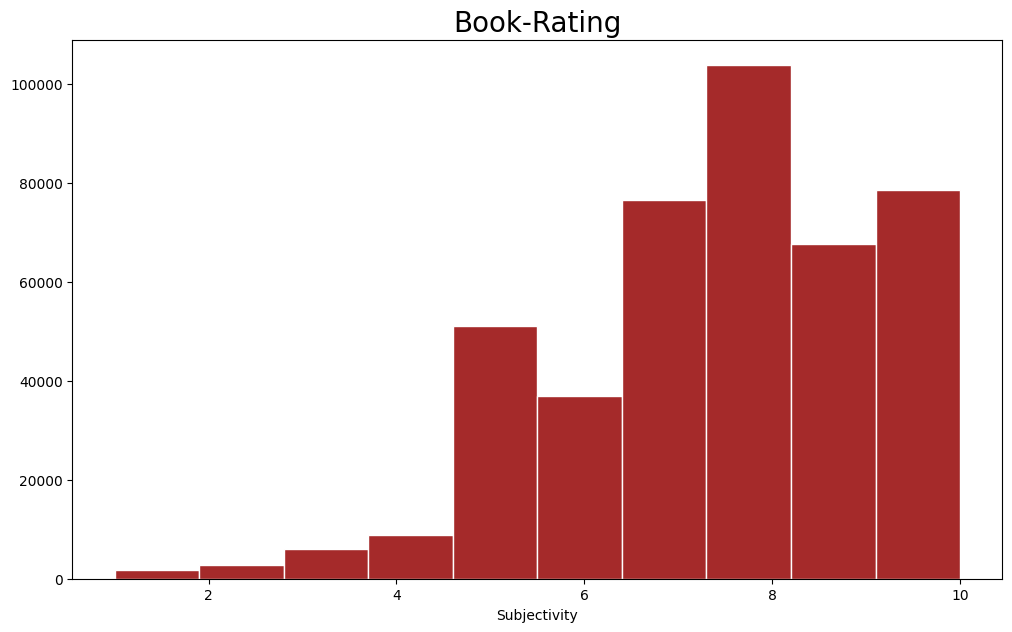

In [56]:
#Histogram Of Book-Rating excluding rating equal to zero
ratings= ratings[ratings['Book-Rating'] != 0]
plt.figure(figsize=(12,7))
plt.xlabel("Subjectivity")
plt.title("Book-Rating",fontsize=20)
plt.hist(ratings['Book-Rating'],color="brown",edgecolor="white")
plt.show()

In [57]:
#Description of book rating
ratings['Book-Rating'].describe()

count    433671.000000
mean          7.601066
std           1.843798
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

Book-Ratings are negatively distributed with median rating of 8.

In [58]:
#print(merged.columns.tolist())

['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'User-ID', 'Location', 'Age', 'Country', 'Book-Rating']

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'User-ID',
 'Location',
 'Age',
 'Country',
 'Book-Rating']

# **Recommender Systems**

![0_Recommendation System.jpg](<attachment:0_Recommendation System.jpg>)

## Popularity Based Recommender System

In [3]:
books = pd.read_csv("Books.csv")
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

In [4]:
books = books[['ISBN', 
               'Book-Title', 
               'Book-Author', 
               'Year-Of-Publication', 
               'Publisher', 
               'Image-URL-M']]

books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

In [5]:
# Merge ratings + users
ratings_users = ratings.merge(users, on="User-ID", how="inner")

In [6]:
# Merge with books to include images
merged = ratings_users.merge(books, on="ISBN", how="inner")

In [7]:
# merged already has ratings + book names + images
ratings_with_name = merged

In [8]:
num_rating_df = (
    ratings_with_name.groupby('Book-Title')['Book-Rating']
    .count().reset_index()
    .rename(columns={'Book-Rating':'num_ratings'})
)

num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [9]:
avg_rating_df = (
    ratings_with_name.groupby('Book-Title')['Book-Rating']
    .mean().reset_index()
    .rename(columns={'Book-Rating':'avg_rating'})
)

avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [10]:
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')

popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [11]:
# Filter popular books: at least 250 ratings
popular_df = (
    popular_df[popular_df['num_ratings'] >= 250]
    .sort_values('avg_rating', ascending=False)
    .head(50)
)

# Since merged already contains book info, just pick required columns
popular_df = popular_df.merge(
    books[['Book-Title', 'Book-Author', 'Image-URL-M']],
    on='Book-Title'
).drop_duplicates('Book-Title')[[
    'Book-Title', 'Book-Author', 'Image-URL-M', 
    'num_ratings', 'avg_rating'
]]

popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

## Collaborative Filtering Based Recommender System

![1_Collaborative Filtering.jpg](<attachment:1_Collaborative Filtering.jpg>)

In [12]:
# Count how many ratings each user has given
x = merged.groupby('User-ID')['Book-Rating'].count() > 200

# Select only those users who have rated more than 200 books
padhe_likhe_users = x[x].index

In [13]:
filtered_rating = merged[merged['User-ID'].isin(padhe_likhe_users)]

In [14]:
# Count how many ratings each book received among filtered users
y = filtered_rating.groupby('Book-Title')['Book-Rating'].count() >= 50

# Select books with at least 50 ratings
famous_books = y[y].index

In [15]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [16]:
pt = final_ratings.pivot_table(
    index='Book-Title',
    columns='User-ID',
    values='Book-Rating'
)

# Replace missing ratings with 0
pt.fillna(0, inplace=True)

pt # pivot table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
cf_similarity = cosine_similarity(pt)

In [18]:
cf_similarity.shape

(706, 706)

In [19]:
def cf_recommend(book_name, top_k=10):
    index = np.where(pt.index == book_name)[0][0]

    similar = sorted(
        list(enumerate(cf_similarity[index])),
        key=lambda x: x[1],
        reverse=True
    )[1:top_k+1]

    output = []
    for idx, score in similar:
        row = books[books['Book-Title'] == pt.index[idx]].drop_duplicates('Book-Title').iloc[0]
        output.append([row['Book-Title'], row['Book-Author'], row['Image-URL-M']])
    return output

In [20]:
cf_recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.MZZZZZZZ.jpg'],
 ['The Hundred Secret Senses',
  'Amy Tan',
  'http://images.amazon.com/images/P/0399141146.01.MZZZZZZZ.jpg']

In [21]:
cf_recommend("Harry Potter and the Sorcerer's Stone (Book 1)")

[['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ['The Mists of Avalon',
  'MARION ZIMMER BRADLEY',
  'http://images.amazon.com/images/P/0345350499.01.MZZZZZZZ.jpg'],
 ["The Bonesetter's Daughter",
  'Amy Tan',
  'http://images.amazon.com/images/P/0399146431.01.MZZZZZZZ.jpg'],
 ['Jacob Have I Loved',
  'Katherine Paterson',
  'http://images.amazon.com/images/P/0380564998.01.MZZZZZZZ.jpg'],
 ['The Tao of Pooh',
  'Benjamin Hoff',
  'http://images.amazon.com/images/P/0140067477.01.MZZZZ

In [22]:
books.drop_duplicates('Book-Title').head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996.0,Random House,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...


## Content-Based Filtering Based Recommender System

![2_Content-Based Filtering.jpg](<attachment:2_Content-Based Filtering.jpg>)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [26]:
# Fill NaNs with empty strings to avoid errors
books.fillna('', inplace=True)

# Combine relevant textual features
books['combined_features'] = (
    books['Book-Title'] + ' ' +
    books['Book-Author'] + ' ' +
    books['Publisher']
)

In [27]:
books['combined_features'] += ' ' + books['Year-Of-Publication'].astype(str)

In [28]:
# Build TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
vector_matrix = tfidf.fit_transform(books['combined_features'])

# Use NearestNeighbors (cosine distance)
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(vector_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [29]:
def content_recommend(book_name, top_k=10):
    idx = books[books['Book-Title'] == book_name].index[0]

    distances, indices = nn.kneighbors(
        vector_matrix[idx],
        n_neighbors=top_k+1
    )

    recs = []
    for i in indices[0][1:]:
        row = books.iloc[i]
        recs.append([row['Book-Title'], row['Book-Author'], row['Image-URL-M']])
    return recs

In [30]:
content_recommend('1984')

[["George Orwell's 1984",
  'George Orwell',
  'http://images.amazon.com/images/P/067100719X.01.MZZZZZZZ.jpg'],
 ['1984.',
  'George Orwell',
  'http://images.amazon.com/images/P/3453164210.01.MZZZZZZZ.jpg'],
 ['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0151660387.01.MZZZZZZZ.jpg'],
 ['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0452262933.01.MZZZZZZZ.jpg'],
 ['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/207036822X.01.MZZZZZZZ.jpg'],
 ['1984 (Signet Classics (Paperback))',
  'George Orwell',
  'http://images.amazon.com/images/P/0881030368.01.MZZZZZZZ.jpg'],
 ['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0582060184.01.MZZZZZZZ.jpg'],
 ['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0451519841.01.MZZZZZZZ.jpg'],
 ['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['1984 : a novel',
  'George Orwell',
  'http://images.amazon.com/images/P/045151

In [31]:
content_recommend("Harry Potter and the Sorcerer's Stone (Book 1)")

[["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043920352X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043936213X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043936213X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone: A Deluxe Pop-up Book",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439294827.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/1594130000.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1, Audio)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0807281751.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Ha

## Hybrid Filtering Based Recommender System (Content + Collaborative)

![3_Hybrid Systems.jpg](<attachment:3_Hybrid Systems.jpg>)

In [32]:
def hybrid_recommend(book_name, top_k=20, w_cf=0.5, w_content=0.5):
    # --- CF Score ---
    if book_name not in pt.index:
        raise ValueError("Book not found in CF model")

    cf_index = np.where(pt.index == book_name)[0][0]
    cf_scores = cf_similarity[cf_index]
    
    # --- Content Score ---
    content_index = books[books['Book-Title'] == book_name].index[0]
    distances, content_indices = nn.kneighbors(
        vector_matrix[content_index],
        n_neighbors=len(books)
    )
    content_scores = 1 - distances[0]     # cosine distance → similarity
    
    # --- Normalize lengths ---
    content_scores_full = np.zeros(len(books))
    content_scores_full[content_indices[0]] = content_scores
    
    # --- Map book titles to CF index ---
    content_scores_for_cf = []
    for title in pt.index:
        i = books[books['Book-Title'] == title].index[0]
        content_scores_for_cf.append(content_scores_full[i])
    content_scores_for_cf = np.array(content_scores_for_cf)

    # --- Weighted Hybrid Score ---
    hybrid_score = (w_cf * cf_scores) + (w_content * content_scores_for_cf)

    # --- Top-K Recommendations ---
    top_items = hybrid_score.argsort()[::-1][1:top_k+1]

    results = []
    for idx in top_items:
        title = pt.index[idx]
        row = books[books['Book-Title'] == title].drop_duplicates('Book-Title').iloc[0]
        results.append([row['Book-Title'], row['Book-Author'], row['Image-URL-M']])

    return results

In [33]:
hybrid_recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['The Drawing of the Three (The Dark Tower, Book 2)',
  'Stephen King',
  'http://images.amazon.com/images/P/0451163524.01.MZZZZZZZ.jpg'],
 ['Nightmares &amp; Dreamscapes',
  'Stephen King',
  'http://images.amazon.com/images/P/0451180232.01.MZZZZZZZ.jpg'],
 ['Wizard and Glass (The Dark Tower, Book 4)',
  'Stephen King',
  'http://images.amazon.com/images/P/0451194861.01.MZZZZZZZ.jpg'],
 ['Pet Sematary',
  'Stephen King',
  'http://images.amazon.com/images/P/0451162072.01.MZZZZZZZ.jpg'],
 ['The Tommyknockers',
  'Stephen King',
  'http://images.amazon.com/images/P/0451156609.01.MZZZZZZZ.jpg'],
 ['The Dark Half',
  'Stephen King',
  'http://images.amazon.com/images/P/0451167317.01.MZZZZZZZ.jpg'],
 ['Dolores Claiborne',
  'Stephen King',
  'http://images.amazon.com/images/P/0451177096.01.MZZZZZZZ.jpg'],
 ['Watership Down',
  'Richard George Adams',
  'http://images.amazon.com/images/P/

In [34]:
hybrid_recommend("Harry Potter and the Sorcerer's Stone (Book 1)")

[['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ['The Stone Diaries',
  'Carol Shields',
  'http://images.amazon.com/images/P/014023313X.01.MZZZZZZZ.jpg'],
 ['Plum Island',
  'Nelson DeMille',
  'http://images.amazon.com/images/P/0446605409.01.MZZZZZZZ.jpg'],
 ['The Mists of Avalon',
  'MARION ZIMMER BRADLEY',
  'http://images.ama

### Save the Recommender Files

In [35]:
import pickle

pickle.dump(popular_df, open('popular.pkl', 'wb'))     # popularity model
pickle.dump(pt, open('pt.pkl', 'wb'))                 # CF pivot matrix
pickle.dump(books, open('books.pkl', 'wb'))           # metadata
pickle.dump(cf_similarity, open('similarity_scores.pkl', 'wb'))   # CF similarity

To run the app, type "streamlit run app.py" in the terminal.

In [121]:
# streamlit run app.py

---